### Mandatory code for all Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Mandatory code for all Algorithm (regression)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

### Mandatory code for all Regression

In [3]:
from sklearn.linear_model import LinearRegression

### Load and Preview the dataset

In [29]:
df = pd.read_csv("auto-mpg.csv")

### Data Exploration

In [30]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
15,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster
280,21.5,6,231.0,115,3245,15.4,79,1,pontiac lemans v6
367,28.0,4,112.0,88,2605,19.6,82,1,chevrolet cavalier
205,28.0,4,97.0,75,2155,16.4,76,3,toyota corolla
209,19.0,4,120.0,88,3270,21.9,76,2,peugeot 504
12,15.0,8,400.0,150,3761,9.5,70,1,chevrolet monte carlo
295,35.7,4,98.0,80,1915,14.4,79,1,dodge colt hatchback custom
210,19.0,6,156.0,108,2930,15.5,76,3,toyota mark ii
187,17.5,8,305.0,140,4215,13.0,76,1,chevrolet chevelle malibu classic
167,29.0,4,97.0,75,2171,16.0,75,3,toyota corolla


#### on exploring the data - Origin cannot be numbers, car name is categorical and should be changed

In [31]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

#### No missing values

In [32]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

#### Horse power is numerical but it is showing object, .........> so check the excel data set and see for the mistake..........> There is a "?" in the place of missing value- this is the problem t be rectified

In [33]:
df.drop("car name", axis = 1, inplace = True)

In [34]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [35]:
### Replace origin with country name

In [36]:
df["origin"] = df["origin"].replace({1:"america",2:"europe",3:"asia"})

In [37]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
193,24.0,6,200.0,81,3012,17.6,76,america


In [38]:
### One hot encoding 


In [39]:
df = pd.get_dummies(df,columns=['origin'])
df. sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
263,17.7,6,231.0,165,3445,13.4,78,1,0,0
257,19.4,6,232.0,90,3210,17.2,78,1,0,0
207,20.0,4,130.0,102,3150,15.7,76,0,0,1
68,13.0,8,350.0,155,4502,13.5,72,1,0,0
81,28.0,4,97.0,92,2288,17.0,72,0,1,0
173,24.0,4,119.0,97,2545,17.0,75,0,1,0
392,27.0,4,151.0,90,2950,17.3,82,1,0,0
70,13.0,8,400.0,190,4422,12.5,72,1,0,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1


In [40]:
### Dealing with missing values

In [41]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [42]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [44]:
df["horsepower"] = df["horsepower"].replace("?",np.nan)

In [45]:
df["horsepower"] = df["horsepower"].astype(float)

In [46]:
median2 = df["horsepower"].median()
median2

93.5

In [47]:
df["horsepower"]=df["horsepower"].replace(np.nan,median2)

In [48]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
342,30.0,4,135.0,84.0,2385,12.9,81,1,0,0
98,16.0,6,250.0,100.0,3278,18.0,73,1,0,0
130,26.0,4,122.0,80.0,2451,16.5,74,1,0,0
268,27.2,4,119.0,97.0,2300,14.7,78,0,1,0
254,20.2,6,200.0,85.0,2965,15.8,78,1,0,0
172,25.0,4,90.0,71.0,2223,16.5,75,0,0,1
104,12.0,8,400.0,167.0,4906,12.5,73,1,0,0
15,22.0,6,198.0,95.0,2833,15.5,70,1,0,0
58,25.0,4,97.5,80.0,2126,17.0,72,1,0,0
100,18.0,6,250.0,88.0,3021,16.5,73,1,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


#### now horse power is also integer

### Cleaned dataset

In [50]:
df.sample(50)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
261,18.1,6,258.0,120.0,3410,15.1,78,1,0,0
171,24.0,4,134.0,96.0,2702,13.5,75,0,1,0
224,15.0,8,302.0,130.0,4295,14.9,77,1,0,0
338,27.2,4,135.0,84.0,2490,15.7,81,1,0,0
369,34.0,4,112.0,88.0,2395,18.0,82,1,0,0
365,20.2,6,200.0,88.0,3060,17.1,81,1,0,0
180,25.0,4,121.0,115.0,2671,13.5,75,0,0,1
130,26.0,4,122.0,80.0,2451,16.5,74,1,0,0
114,26.0,4,98.0,90.0,2265,15.5,73,0,0,1
40,14.0,8,351.0,153.0,4154,13.5,71,1,0,0


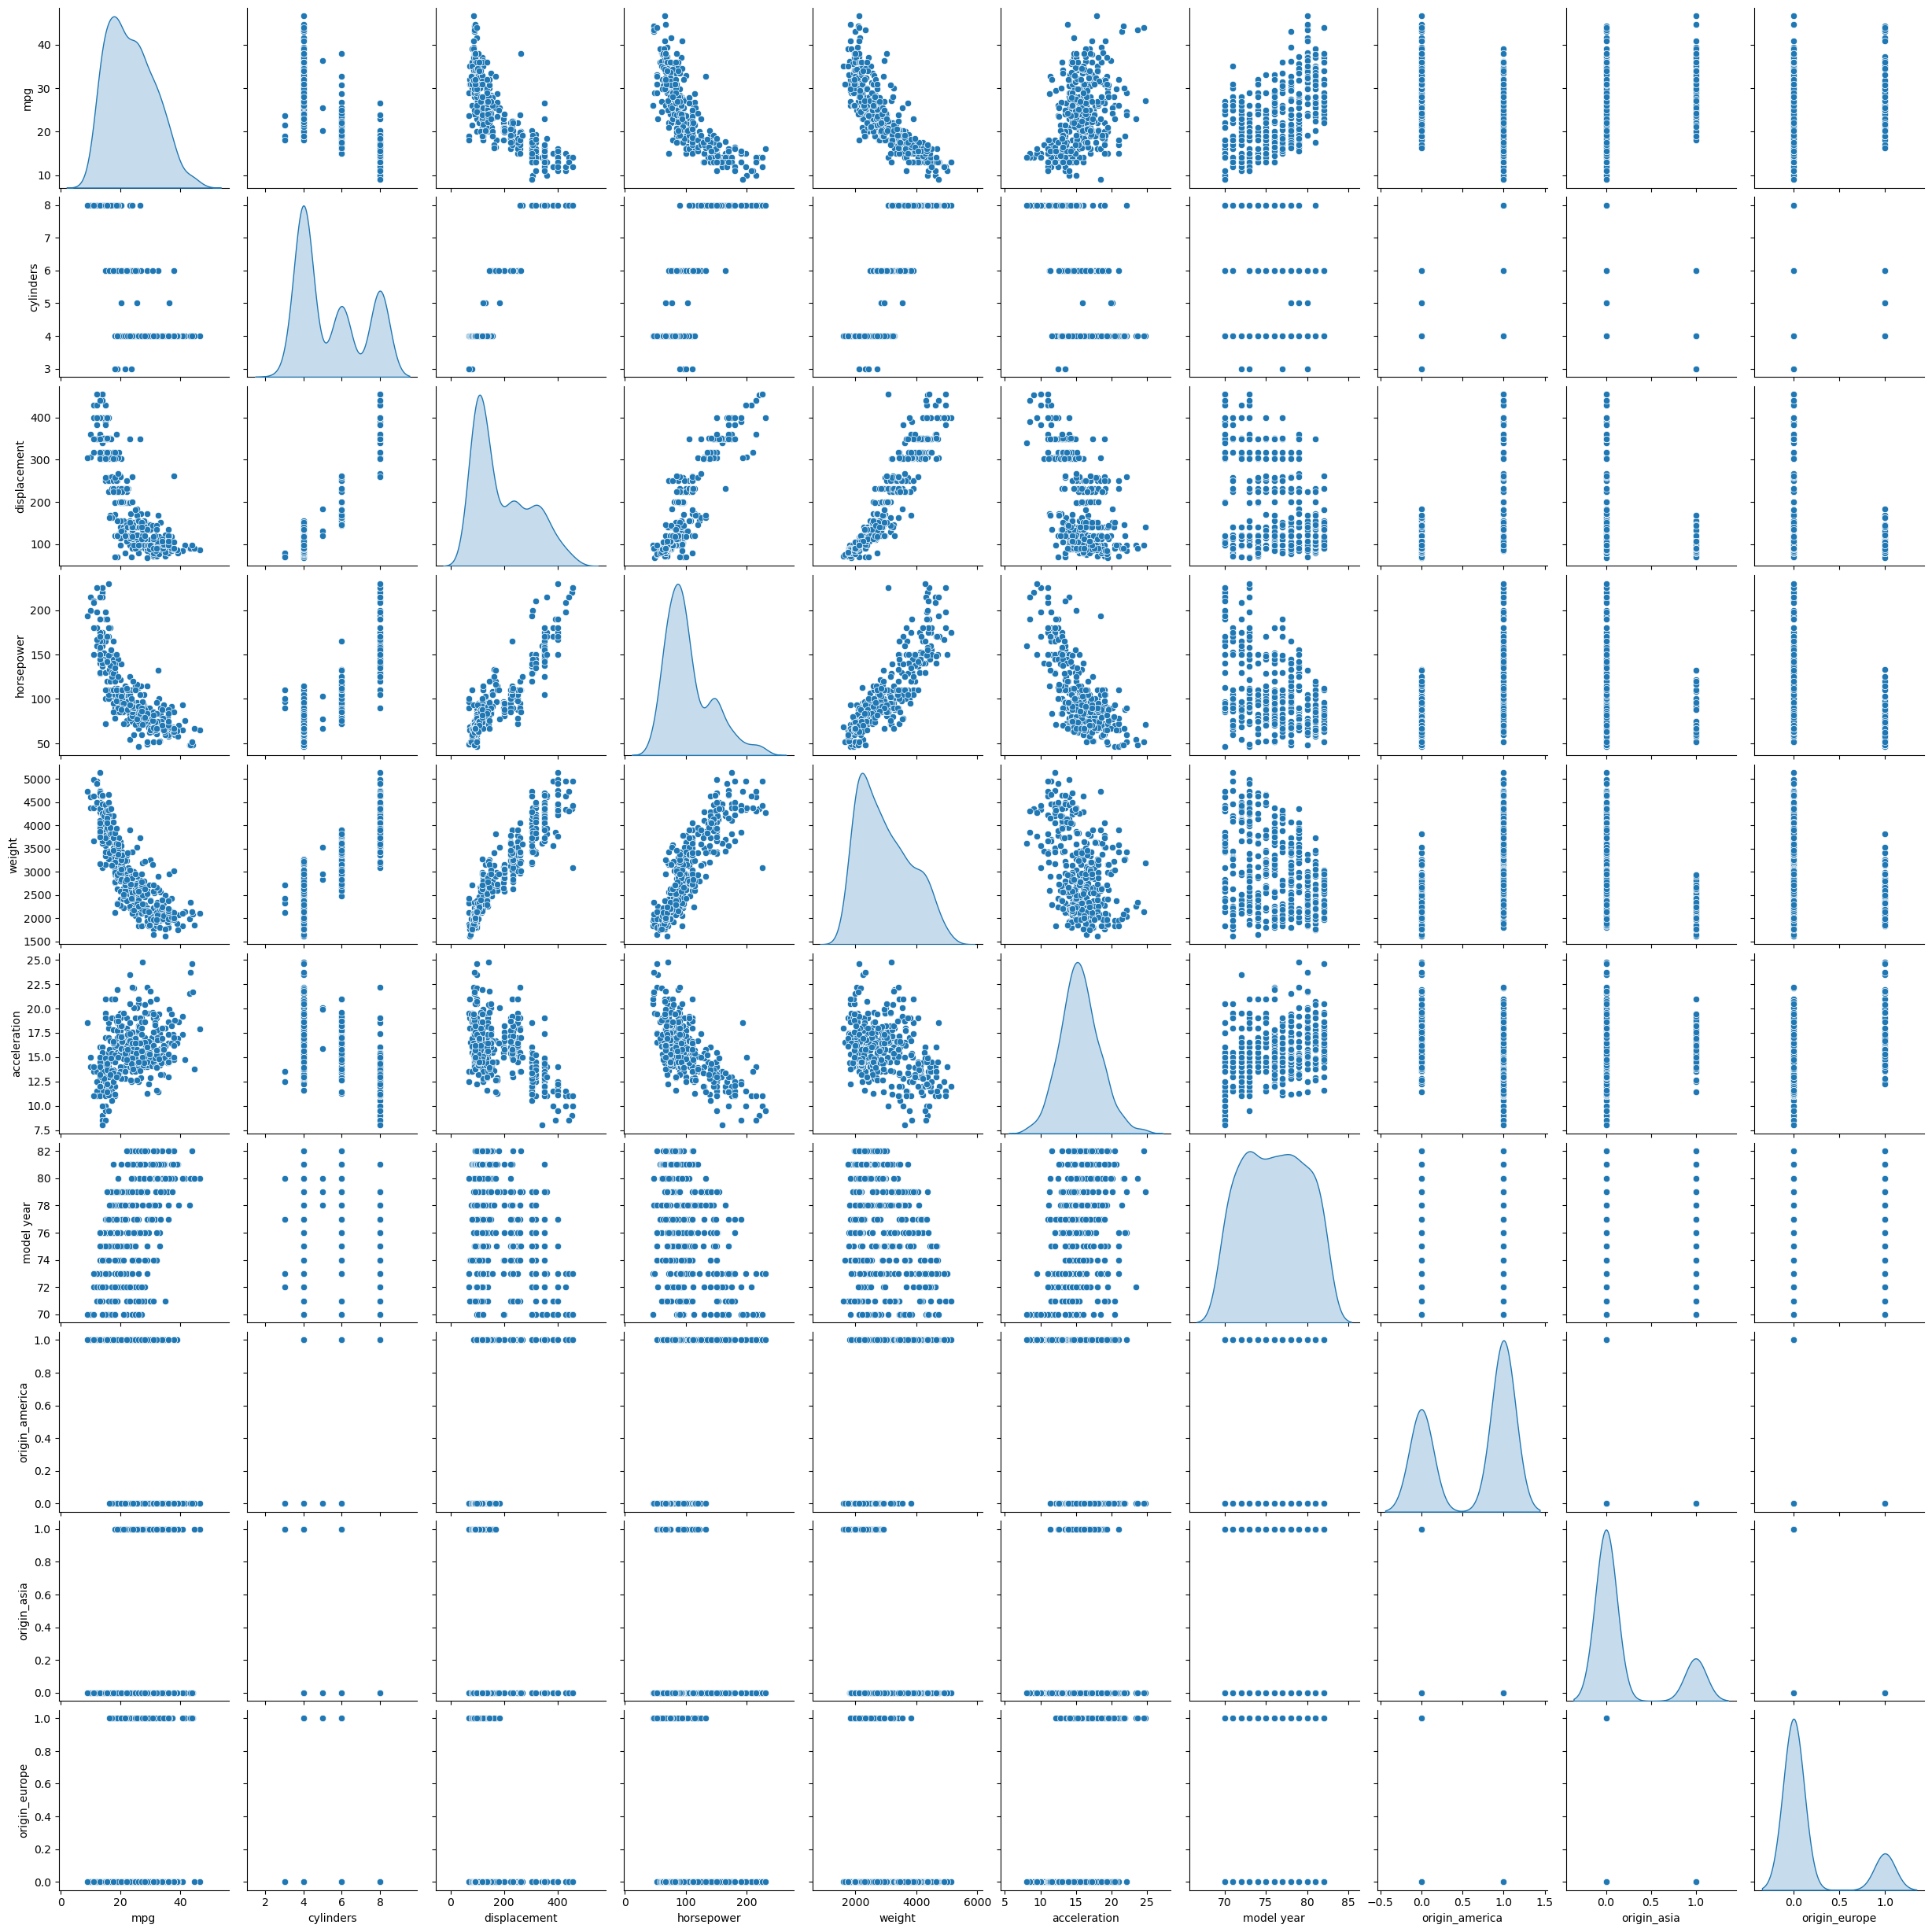

In [57]:
sns.pairplot(df,diag_kind='kde')
plt.show()

#### Let us build our linear model
### X axis - independent variable - all column except mpg
### Y axis - dependent variable - mpg

In [51]:
x= df.drop(['mpg'], axis =1)
y = df[['mpg']]

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=12)

In [83]:
model_1= LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [84]:
model_1.score(x_train,y_train)

0.8132891752457155

In [85]:
model_1.score(x_test,y_test)

0.8460469282861398